# RUZ0096

In [3]:
import numpy as np
import pandas as pd
import sklearn.cluster as cluster
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import time

# Implementace algoritmu DBSCAN

In [4]:
class MY_DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = []

    def fit(self, X):
        self.labels = [-1] * len(X)  # Initialize all points as noise (-1)
        cluster_id = 0

        for i in range(len(X)):
            if self.labels[i] != -1:
                continue  # Skip if already processed
            
            neighbors = self._region_query(X, i)
            if len(neighbors) < self.min_samples:
                self.labels[i] = -1  # Mark as noise
            else:
                self._expand_cluster(X, i, neighbors, cluster_id)
                cluster_id += 1

        return self

    def _region_query(self, X, point_idx):
        neighbors = []
        for i in range(len(X)):
            if np.linalg.norm(X[point_idx] - X[i]) <= self.eps:
                neighbors.append(i)
        return neighbors

    def _expand_cluster(self, X, point_idx, neighbors, cluster_id):
        self.labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            
            if self.labels[neighbor_idx] == -1:  # Change noise to cluster point
                self.labels[neighbor_idx] = cluster_id
            
            elif self.labels[neighbor_idx] == -1 or self.labels[neighbor_idx] == -1:  # Process unvisited points
                self.labels[neighbor_idx] = cluster_id
                new_neighbors = self._region_query(X, neighbor_idx)
                if len(new_neighbors) >= self.min_samples:
                    neighbors.extend(new_neighbors)
            i += 1

## Načtení datasetu a pre-processing

In [5]:
data = pd.read_csv("iris.csv")
numerical_data = data.select_dtypes(include=[np.number]).fillna(0)
normalized_data = normalize(numerical_data)
X = normalized_data

In [6]:
type(X)

numpy.ndarray

## Hyperparameter tuning pro mou implementaci algoritmu DBSCAN

In [7]:
best_eps = None
best_min_samples = None
best_score = -1

eps_values = np.linspace(0.1, 0.5, 20)
min_samples_values = range(2, 40)

time_start = time.time()
for eps in eps_values:
    for min_samples in min_samples_values:
        my_dbscan = MY_DBSCAN(eps=eps, min_samples=min_samples)
        labels = my_dbscan.fit(X)
        print(f"eps: {eps}, min_samples: {min_samples}, Number of clusters found: {len(set(labels.labels)) - (1 if -1 in labels.labels else 0)}")
        # Ignore clusters with all noise
        if len(set(labels.labels)) == 1:
            continue
        else:
            score = silhouette_score(X, labels.labels)
            print(f"Silhouette Score: {score}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
time_end = time.time()
my_dbscan_hyperparameter_tuning_time = time_end - time_start

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")

eps: 0.1, min_samples: 2, Number of clusters found: 7
Silhouette Score: 0.2946059809266549
eps: 0.1, min_samples: 3, Number of clusters found: 7
Silhouette Score: 0.2946059809266549
eps: 0.1, min_samples: 4, Number of clusters found: 7
Silhouette Score: 0.2946059809266549
eps: 0.1, min_samples: 5, Number of clusters found: 7
Silhouette Score: 0.2946059809266549
eps: 0.1, min_samples: 6, Number of clusters found: 7
Silhouette Score: 0.2946059809266549
eps: 0.1, min_samples: 7, Number of clusters found: 7
Silhouette Score: 0.2946059809266549
eps: 0.1, min_samples: 8, Number of clusters found: 7
Silhouette Score: 0.2946059809266549
eps: 0.1, min_samples: 9, Number of clusters found: 7
Silhouette Score: 0.2946059809266549
eps: 0.1, min_samples: 10, Number of clusters found: 7
Silhouette Score: 0.2946059809266549
eps: 0.1, min_samples: 11, Number of clusters found: 7
Silhouette Score: 0.2946059809266549
eps: 0.1, min_samples: 12, Number of clusters found: 7
Silhouette Score: 0.2946059809266

## Fitting

In [8]:
my_dbscan = MY_DBSCAN(eps=best_eps, min_samples=best_min_samples)
fitting_time_start = time.time()
my_dbscan.fit(X)
fitting_time_end = time.time()
my_dbscan_fitting_time = fitting_time_end - fitting_time_start
print("Cluster labels:", my_dbscan.labels)


n_clusters = len(set(my_dbscan.labels))
print("Number of clusters found (with noise cluster):", n_clusters)

Cluster labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Number of clusters found (with noise cluster): 2



# Scikit-learn implementace + Hyperparameter tuning

In [9]:
best_eps = None
best_min_samples = None
best_score = -1

eps_values = np.linspace(0.1, 0.5, 20)
min_samples_values = range(2, 40)

time_start = time.time()
for eps in eps_values:
    for min_samples in min_samples_values:
        sklearn_dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
        labels = sklearn_dbscan.fit_predict(X)

        # Ignore clusters with all noise
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
time_end = time.time()
sklearn_dbscan_hyperparameter_tuning_time = time_end - time_start
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")

Best eps: 0.1, Best min_samples: 2, Best Silhouette Score: 0.8040303655962738


In [10]:
sklearn_dbscan = cluster.DBSCAN(eps=best_eps, min_samples=best_min_samples)
time_start = time.time()
sklearn_dbscan.fit(X)
time_end = time.time()
sklearn_dbscan_fitting_time = time_end - time_start
print("Number of clusters:", len(set(sklearn_dbscan.labels_)))

Number of clusters: 2


# Porovnání

In [11]:
def plot_comparison(data,title_1,labels_1,title_2,labels_2):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.title(title_1)
    plt.scatter(data[:, 0], data[:, 1], c=labels_1)
    plt.subplot(122)
    plt.title(title_2)
    plt.scatter(data[:, 0], data[:, 1], c=labels_2)
    plt.show()

def load_data(filename):
    df = pd.read_csv(filename)
    return df.values

def fit_data(data,my_dbscan,sklearn_dbscan):
    my_dbscan.fit(data)
    sklearn_dbscan.fit(data)
    return my_dbscan.labels, sklearn_dbscan.labels_

In [18]:
mydbscan = MY_DBSCAN(eps=0.5, min_samples=5)
sklearn_dbscan = cluster.DBSCAN(eps=0.5, min_samples=5)

## Graficky

## Iris

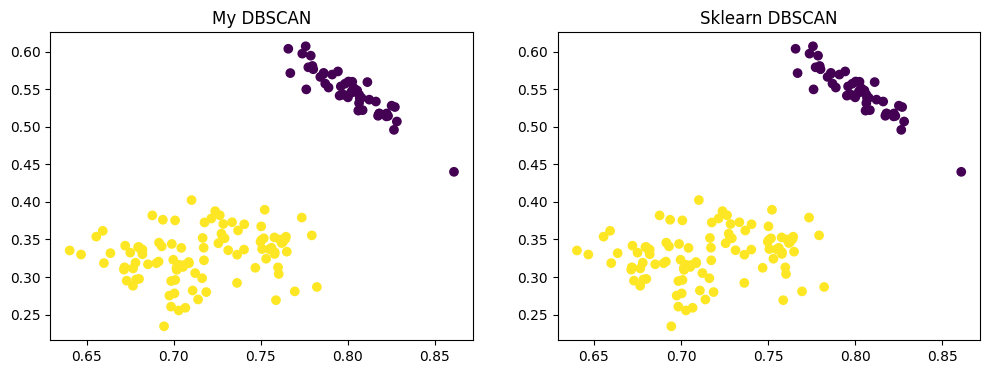

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title("My DBSCAN")
plt.scatter(X[:, 0], X[:, 1], c=my_dbscan.labels)
plt.subplot(122)
plt.title("Sklearn DBSCAN")
plt.scatter(X[:, 0], X[:, 1], c=sklearn_dbscan.labels_)
plt.show()

## Annulus

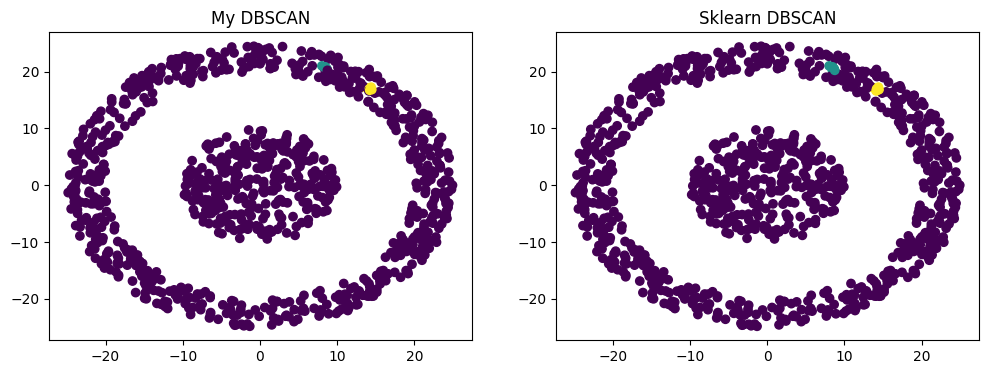

In [19]:
filename = 'annulus.csv'
data = load_data(filename)
my_dbscan_labels, sklearn_labels = fit_data(data,mydbscan,sklearn_dbscan)
plot_comparison(data,"My DBSCAN", my_dbscan_labels, "Sklearn DBSCAN", sklearn_labels)

## Boxes

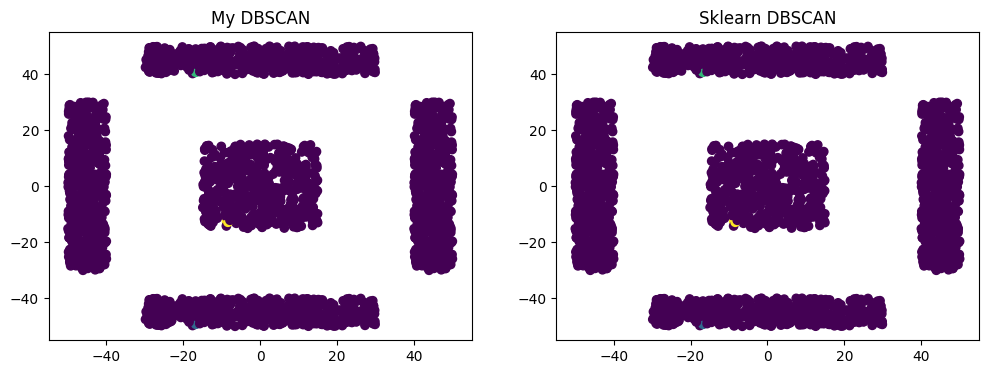

In [20]:
filename = 'boxes.csv'
data = load_data(filename)
my_dbscan_labels, sklearn_labels = fit_data(data,mydbscan,sklearn_dbscan)
plot_comparison(data,"My DBSCAN", my_dbscan_labels, "Sklearn DBSCAN", sklearn_labels)

## clusters3

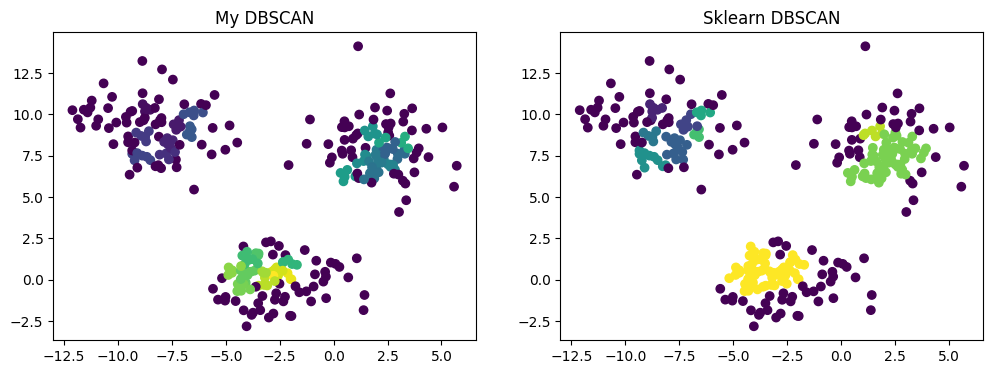

In [21]:
filename = 'clusters3.csv'
data = load_data(filename)
my_dbscan_labels, sklearn_labels = fit_data(data,mydbscan,sklearn_dbscan)
plot_comparison(data,"My DBSCAN", my_dbscan_labels, "Sklearn DBSCAN", sklearn_labels)

## clusters5

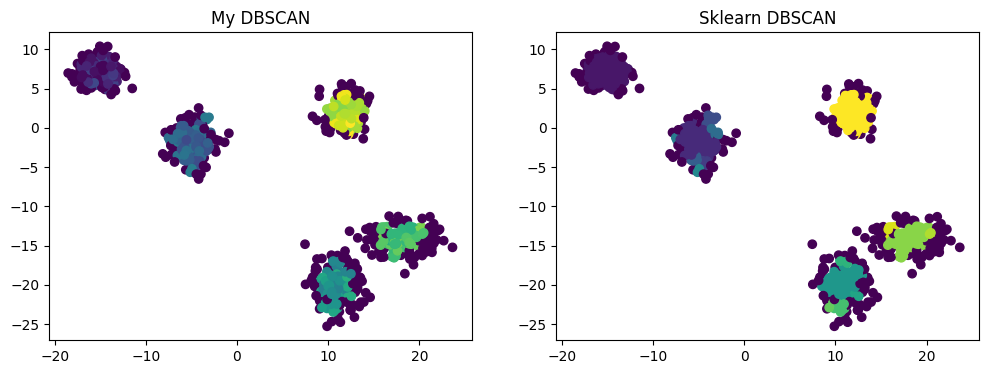

In [22]:
filename = 'clusters5.csv'
data = load_data(filename)
my_dbscan_labels, sklearn_labels = fit_data(data,mydbscan,sklearn_dbscan)
plot_comparison(data,"My DBSCAN", my_dbscan_labels, "Sklearn DBSCAN", sklearn_labels)

## clusters5n

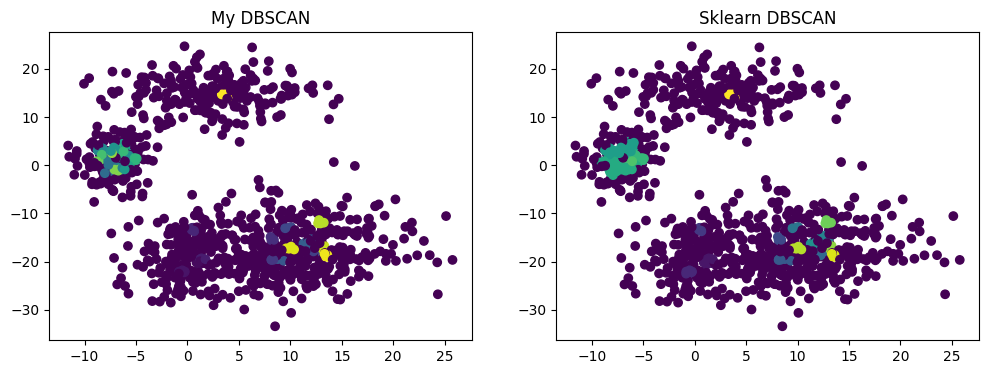

In [23]:
filename = 'clusters5n.csv'
data = load_data(filename)
my_dbscan_labels, sklearn_labels = fit_data(data,mydbscan,sklearn_dbscan)
plot_comparison(data,"My DBSCAN", my_dbscan_labels, "Sklearn DBSCAN", sklearn_labels)

## densegrid

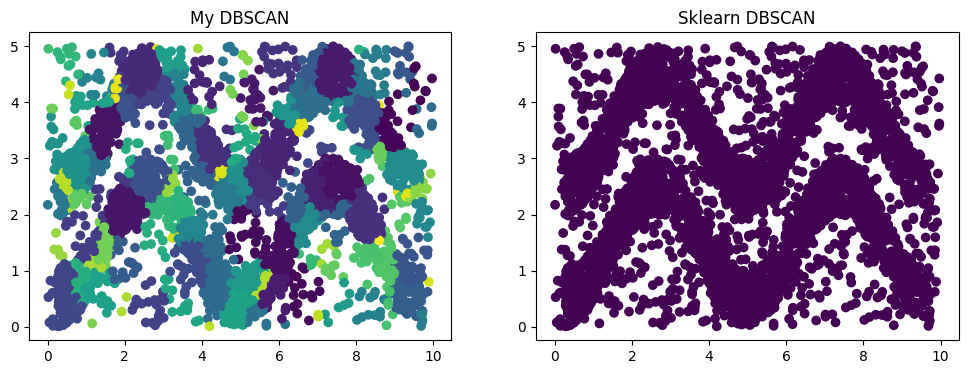

In [24]:
filename = 'densegrid.csv'
data = load_data(filename)
my_dbscan_labels, sklearn_labels = fit_data(data,mydbscan,sklearn_dbscan)
plot_comparison(data,"My DBSCAN", my_dbscan_labels, "Sklearn DBSCAN", sklearn_labels)

## Časová náročnost

## Iris

In [58]:
print("-" * 100)
print(f"My DBSCAN Hyperparameter Tuning Time: {my_dbscan_hyperparameter_tuning_time:.4f} seconds")
print(f"Sklearn DBSCAN Hyperparameter Tuning Time: {sklearn_dbscan_hyperparameter_tuning_time:.4f} seconds")

if my_dbscan_hyperparameter_tuning_time > sklearn_dbscan_hyperparameter_tuning_time:
    print(f"Sklearn DBSCAN Hyperparameter Tuning Time is {my_dbscan_hyperparameter_tuning_time - sklearn_dbscan_hyperparameter_tuning_time:.4f} seconds faster than My DBSCAN")
else:
    print(f"My DBSCAN Hyperparameter Tuning Time is {sklearn_dbscan_hyperparameter_tuning_time - my_dbscan_hyperparameter_tuning_time:.4f} seconds faster than Sklearn DBSCAN")

print("-" * 100)
print(f"My DBSCAN Fitting Time: {my_dbscan_fitting_time:.4f} seconds")
print(f"Sklearn DBSCAN Fitting Time: {sklearn_dbscan_fitting_time:.4f} seconds")

if my_dbscan_fitting_time > sklearn_dbscan_fitting_time:
    print(f"Sklearn DBSCAN Fitting Time is {my_dbscan_fitting_time - sklearn_dbscan_fitting_time:.4f} seconds faster than My DBSCAN")
else:
    print(f"My DBSCAN Fitting Time is {sklearn_dbscan_fitting_time - my_dbscan_fitting_time:.4f} seconds faster than Sklearn DBSCAN")
print("-" * 100)

----------------------------------------------------------------------------------------------------
My DBSCAN Hyperparameter Tuning Time: 1.7687 seconds
Sklearn DBSCAN Hyperparameter Tuning Time: 1.1526 seconds
Sklearn DBSCAN Hyperparameter Tuning Time is 0.6161 seconds faster than My DBSCAN
----------------------------------------------------------------------------------------------------
My DBSCAN Fitting Time: 0.0010 seconds
Sklearn DBSCAN Fitting Time: 0.0020 seconds
My DBSCAN Fitting Time is 0.0010 seconds faster than Sklearn DBSCAN
----------------------------------------------------------------------------------------------------


# Závěr

### Ladění hyperparametrů:
Čas potřebný na ladění hyperparametrů u mé implementace DBSCAN byl 1,7687 sekundy, zatímco u implementace z knihovny Sklearn trval pouze 1,1526 sekundy.
Sklearn DBSCAN je v této fázi rychlejší o 0,6161 sekundy, což naznačuje vyšší efektivitu optimalizačního procesu.
Čas potřebný na vlastní fitování:

Moje implementace DBSCAN dosáhla času 0,0010 sekundy, zatímco Sklearn DBSCAN potřeboval 0,0020 sekundy.
V tomto případě je moje implementace rychlejší o 0,0010 sekundy, což ukazuje na její vyšší rychlost při samotném fitování dat.

### Případné zlepšení
Při počítání sousedů lze použít jiný způsob jako je napřiklad Ball-Tree nebo KD-Tree.
Sklearn implementace využívá paralelizace a vektorové operace, které běží v C / Cythonu.
Další možné zlepšení by šly identifikovat profilováním kódu, kde by šlo zjistit, které řádky kódu "běží nejdéle".


### Shrnutí
Moje implementace DBSCAN vyniká rychlejším fitováním dat, zatímco implementace z knihovny Sklearn je výrazně efektivnější při ladění hyperparametrů. Výsledky mého DBSCANu jsou uspokojivé, DBSCAN z sklearn knihovny je přesnější díky jiné metodice počítání sousedů.